# Metrics Analyses

This notebooks summarize metric's results on evaluation set, do learning, and plotting

In [1]:
import os
import json
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import pprint

sns.set(font_scale=1.4)
sns.set_style("whitegrid", {
    "grid.linestyle": 'dashed',
    "axes.edgecolor": '#475569',
    'font.family': ['sans-serif'],
    'font.sans-serif': ['Arial',
        'Droid Sans',
        'sans-serif'
    ],
})

%matplotlib inline

ROOT_DIR = os.path.dirname(os.getcwd())
root_dir = Path(ROOT_DIR)

## 1. Gini Scores

Randomly initialized models
[{'decoder_act': 'softmax',
  'mean': tensor([0.2498, 0.2576, 0.2693, 0.2547, 0.2623, 0.2711]),
  'std': tensor([0.0421, 0.0370, 0.0382, 0.0308, 0.0366, 0.0336])},
 {'decoder_act': 'entmax15',
  'mean': tensor([0.8609, 0.8901, 0.8948, 0.8986, 0.8901, 0.8952]),
  'std': tensor([0.0245, 0.0192, 0.0184, 0.0165, 0.0188, 0.0182])},
 {'decoder_act': 'sparsemax',
  'mean': tensor([0.9760, 0.9816, 0.9795, 0.9841, 0.9806, 0.9816]),
  'std': tensor([0.0027, 0.0022, 0.0036, 0.0016, 0.0026, 0.0025])},
 {'decoder_act': 'alpha_entmax',
  'mean': tensor([0.7982, 0.8180, 0.8224, 0.8272, 0.8141, 0.8226]),
  'std': tensor([0.0230, 0.0174, 0.0175, 0.0161, 0.0182, 0.0196])}]
Trained models
[{'decoder_act': 'softmax',
  'mean': tensor([0.9626, 0.9884, 0.9814, 0.9809, 0.9438, 0.9432]),
  'std': tensor([0.0054, 0.0024, 0.0024, 0.0031, 0.0082, 0.0087])},
 {'decoder_act': 'entmax15',
  'mean': tensor([0.9764, 0.9913, 0.9877, 0.9884, 0.9902, 0.9888]),
  'std': tensor([0.0046, 0.0011,

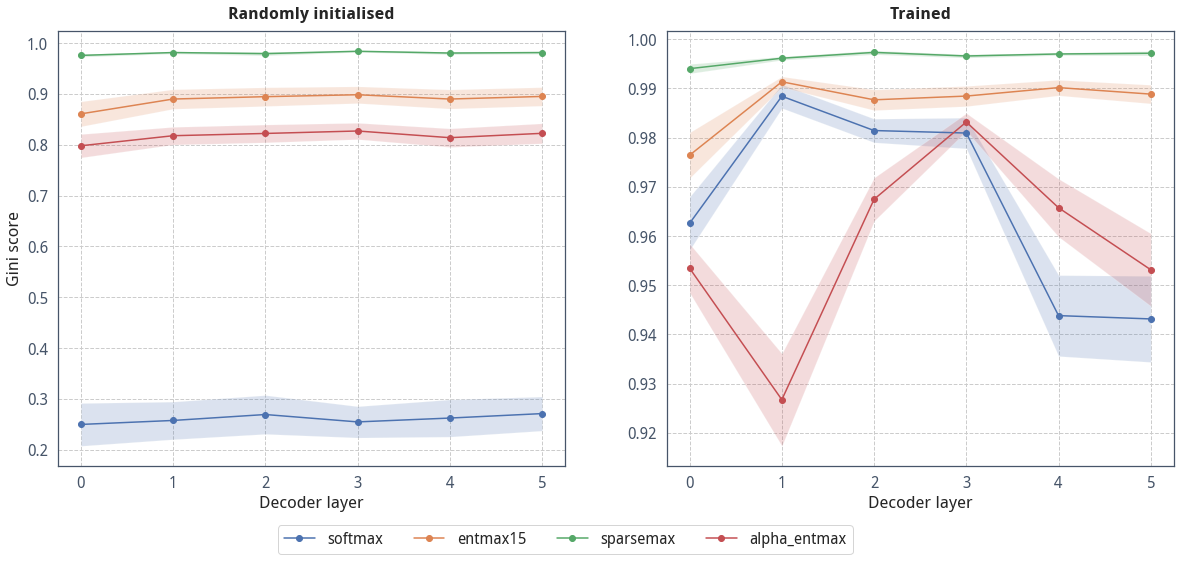

In [2]:
fig, axlist = plt.subplots(1, 2, figsize=(20, 8))

ax1, ax2 = axlist

# Randomly initialise
data = []
filenames = ["softmax-gini-random.pt", "entmax15-gini-random.pt", "sparsemax-gini-random.pt", "alpha_entmax-gini-random.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / "gini" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

print("Randomly initialized models")
pprint.pprint(data)

for item in data:
    ax1.plot(item['mean'], marker='o', label=item['decoder_act'])
    ax1.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax1.set_title("Randomly initialised", pad=12, fontweight="bold")
ax1.set_xlabel("Decoder layer")
ax1.set_ylabel("Gini score")
ax1.tick_params(colors='#475569')

# Train models
data = []
filenames = ["softmax-gini.pt", "entmax15-gini.pt", "sparsemax-gini.pt", "alpha_entmax-gini.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / "gini" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

print("Trained models")
pprint.pprint(data)

for item in data:
    ax2.plot(item['mean'], marker='o', label=item['decoder_act'])
    ax2.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax2.set_title("Trained", pad=12, fontweight="bold")
ax2.set_xlabel("Decoder layer")
ax2.tick_params(colors='#475569')

# Gather common legends
axlist.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(1.0, -0.12), ncol=4)
fig.savefig("./images/gini-scores-w-a_entmax.png", bbox_inches='tight')
fig.savefig("./images/gini-scores-w-a_entmax.pdf", bbox_inches='tight')

## 2. Percentage of Zero Entries

This section presents the results for **zero-entries ratio** metric that we have computed for the baseline softmax, entmax15 and sparsemax models, both randomly initialised and trained.

Randomly initialized models
[{'decoder_act': 'softmax',
  'mean': tensor([0., 0., 0., 0., 0., 0.]),
  'std': tensor([0., 0., 0., 0., 0., 0.])},
 {'decoder_act': 'entmax15',
  'mean': tensor([0.7479, 0.7775, 0.7933, 0.7874, 0.7819, 0.7900]),
  'std': tensor([0.0465, 0.0398, 0.0337, 0.0369, 0.0374, 0.0369])},
 {'decoder_act': 'sparsemax',
  'mean': tensor([0.9608, 0.9698, 0.9675, 0.9734, 0.9685, 0.9701]),
  'std': tensor([0.0039, 0.0031, 0.0048, 0.0023, 0.0036, 0.0034])},
 {'decoder_act': 'alpha_entmax',
  'mean': tensor([0.5765, 0.5896, 0.5826, 0.5956, 0.6180, 0.6030]),
  'std': tensor([0.0291, 0.0249, 0.0227, 0.0226, 0.0213, 0.0236])}]
Trained models
[{'decoder_act': 'softmax',
  'mean': tensor([0.7114, 0.9109, 0.8597, 0.8863, 0.7083, 0.6626]),
  'std': tensor([0.0426, 0.0339, 0.0284, 0.0239, 0.0282, 0.0292])},
 {'decoder_act': 'entmax15',
  'mean': tensor([0.9541, 0.9825, 0.9736, 0.9765, 0.9788, 0.9776]),
  'std': tensor([0.0097, 0.0023, 0.0049, 0.0041, 0.0035, 0.0040])},
 {'decoder_a

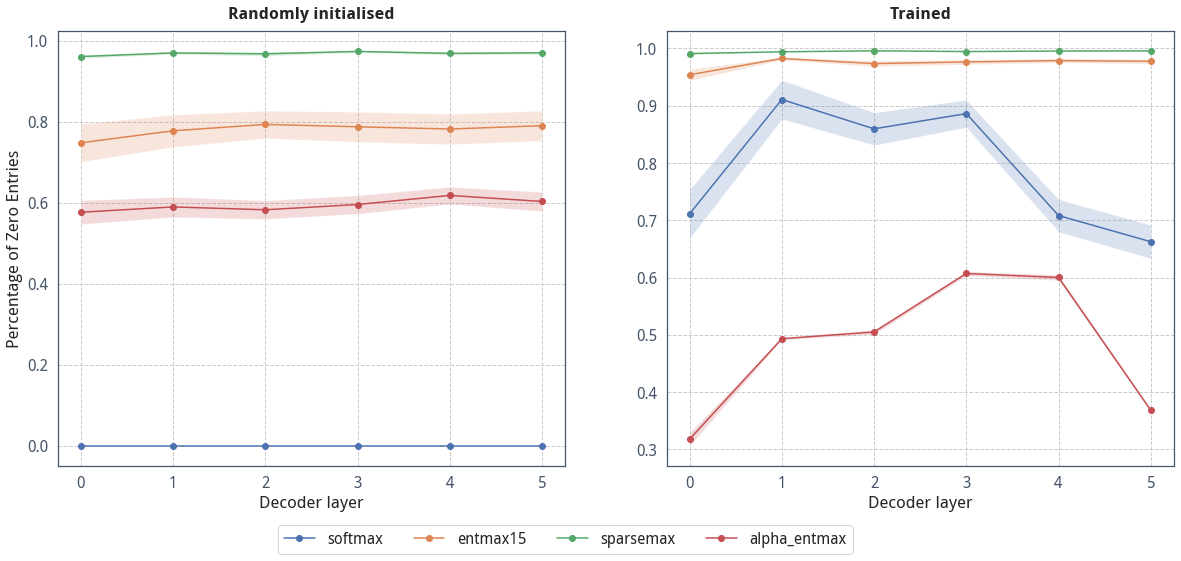

In [3]:
fig, axlist = plt.subplots(1, 2, figsize=(20, 8))

ax1, ax2 = axlist

# Randomly initialise
data = []
filenames = ["softmax-zeros_ratio-1e-06-random.pt", "entmax15-zeros_ratio-random.pt", "sparsemax-zeros_ratio-random.pt", "alpha_entmax-zeros_ratio-random.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / "zeros_ratio" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)
print("Randomly initialized models")
pprint.pprint(data)

for item in data:
    ax1.plot(item['mean'], marker='o', label=item['decoder_act'])
    ax1.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax1.set_title("Randomly initialised", pad=12, fontweight="bold")
ax1.set_xlabel("Decoder layer")
ax1.set_ylabel("Percentage of Zero Entries")
ax1.tick_params(colors='#475569')

# Train models
data = []
filenames = ["softmax-zeros_ratio-1e-06.pt", "entmax15-zeros_ratio.pt", "sparsemax-zeros_ratio.pt", "alpha_entmax-zeros_ratio.pt"]
for fn in filenames:
    fpath = root_dir / "outputs" / "metrics" / "zeros_ratio" / fn
    in_data = torch.load(fpath)
    item = {
        "decoder_act": in_data['decoder_act'],
        "mean": in_data['mean'],
        "std": in_data['std']
    }
    data.append(item)

print("Trained models")
pprint.pprint(data)

for item in data:
    ax2.plot(item['mean'], marker='o', label=item['decoder_act'])
    ax2.fill_between(np.arange(6), item['mean']-item['std'], item['mean']+item['std'], alpha=0.2)

ax2.set_title("Trained", pad=12, fontweight="bold")
ax2.set_xlabel("Decoder layer")
ax2.tick_params(colors='#475569')

# Gather common legends
axlist.flatten()[-2].legend(loc='upper center', bbox_to_anchor=(1.0, -0.12), ncol=4)
fig.savefig("./images/perc_zeros-scores_w-a_entmax.png", bbox_inches='tight')
fig.savefig("./images/perc_zeros-scores_w-a_entmax.pdf", bbox_inches='tight')

## 3. Percentage of Attentions Inside Bounding Boxes (PAIBB)

In [4]:
def read_data(fname: str):
    metric_dir = root_dir / "outputs" / "metrics" / "paibb"

    data = []
    fpath = metric_dir / fname
    with open(fpath, "r") as f:
        for line in f:
            # Replace single quotes with double quotes for JSONEncoder to work
            line = line.replace("\'", "\"")
            item = json.loads(line)
            data.append(item)


    df = pd.DataFrame(data)
    return df

**Collect data for visualization**

In [5]:
softmax_df = read_data("paibb_softmax.txt")
entmax15_df = read_data("paibb_entmax15.txt")
sparsemax_df = read_data("paibb_sparsemax.txt")
alpha_entmax_df = read_data("paibb_alpha_entmax.txt")

data = [
    {'model': 'softmax', 'mean': softmax_df['paibb'].mean(), 'std': softmax_df['paibb'].std()},
    {'model': 'entmax15', 'mean': entmax15_df['paibb'].mean(), 'std': entmax15_df['paibb'].std()},
    {'model': 'sparsemax', 'mean': sparsemax_df['paibb'].mean(), 'std': sparsemax_df['paibb'].std()},
    {'model': 'alpha_entmax', 'mean': alpha_entmax_df['paibb'].mean(), 'std': alpha_entmax_df['paibb'].std()},
]

df = pd.DataFrame(data)

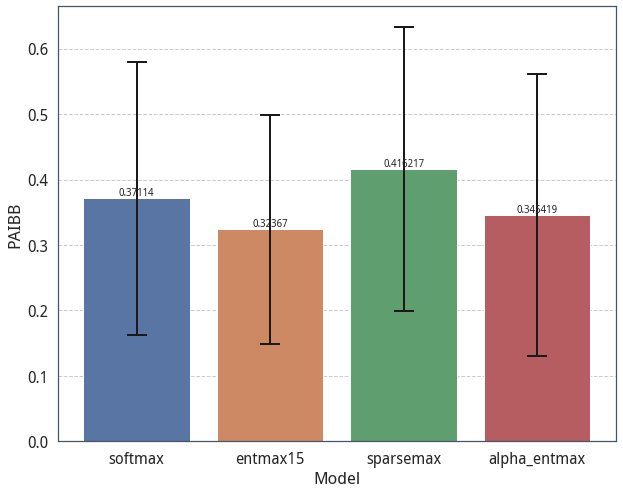

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
sax = sns.barplot(data=df, x='model', y='mean', ax=ax)

ax.set_xlabel("Model")
ax.set_ylabel("PAIBB")
x_coords = [p.get_x() + 0.5 * p.get_width() for p in sax.patches]
y_coords = [p.get_height() for p in sax.patches]
plt.errorbar(x=x_coords, y=y_coords, yerr=df['std'], fmt="none", c="k", capsize=10, elinewidth=2, markeredgewidth=2)
sax.bar_label(sax.containers[0])
fig.savefig("./images/paibb-scores-w-a_entmax.png", bbox_inches='tight')
fig.savefig("./images/paibb-scores-w-a_entmax.pdf", bbox_inches='tight')

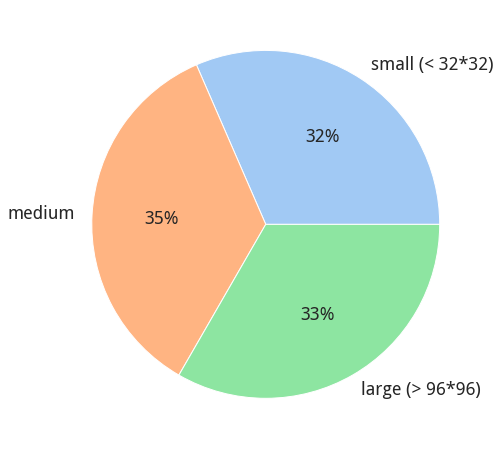

In [16]:
small = softmax_df[softmax_df.gt_area < 32*32].count()[0]
medium = softmax_df[(softmax_df.gt_area >= 32*32) & (softmax_df.gt_area <= 96*96)].count()[0]
large = softmax_df[softmax_df.gt_area > 96*96].count()[0]

total = small +  medium +  large
data = [small / total * 100, medium / total * 100, large / total * 100]
labels = ['small (< 32*32)', 'medium', 'large (> 96*96)']
colors = sns.color_palette('pastel')[0:3]

fig, ax = plt.subplots(figsize=(8, 8))
patches, texts, autotexts = plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 18})
# plt.legend()
fig.set_facecolor('white')
fig.savefig("images/object_size_dist.png", bbox_inches='tight')
fig.savefig("images/object_size_dist.pdf", bbox_inches='tight')

In [8]:
def get_stat(frame):
    small_df = frame[frame.gt_area < 32*32]
    medium_df = frame[(frame.gt_area >= 32*32) & (frame.gt_area <= 96*96)]
    large_df = frame[frame.gt_area > 96*96]
    return {
        "small_mean": small_df['paibb'].mean(),
        "small_std": small_df['paibb'].std(),
        "medium_mean": medium_df['paibb'].mean(),
        "medium_std": medium_df['paibb'].std(),
        "large_mean": large_df['paibb'].mean(),
        "large_std": large_df['paibb'].std(),
    }

In [9]:
data = [
    {'model': 'softmax', **get_stat(softmax_df)},
    {'model': 'entmax15', **get_stat(entmax15_df)},
    {'model': 'sparsemax', **get_stat(sparsemax_df)}
]
df = pd.DataFrame(data)
df

,model,small_mean,small_std,medium_mean,medium_std,large_mean,large_std
0,softmax,0.137284,0.099792,0.384414,0.107122,0.578394,0.119923
1,entmax15,0.135650,0.098559,0.352258,0.097333,0.471395,0.129202
2,sparsemax,0.169174,0.125743,0.454507,0.124987,0.609549,0.112674


In [10]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
